### Introduction to Math for DS Personal Assignnment

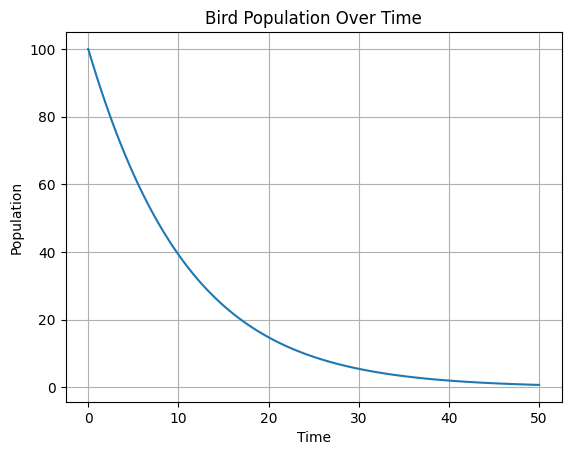

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def bird_population_model(t, K, P0, r):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))


# Parameters
K = 1000  # Carrying capacity
P0 = 100  # Initial population
r = -0.1  # Negative growth rate

# Time points
t = np.linspace(0, 50, 100)

# Calculate the population over time
population = bird_population_model(t, K, P0, r)

# Plot the population over time
plt.plot(t, population)
plt.title("Bird Population Over Time")
plt.xlabel("Time")
plt.ylabel("Population")
plt.grid(True)
plt.show()

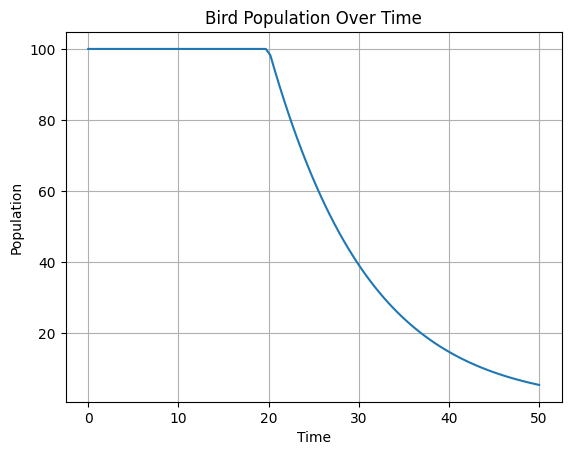

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def bird_population_model(t, K, P0, r, t_invasion):
    population = np.zeros_like(t)
    for i, time in enumerate(t):
        if time < t_invasion:
            population[i] = P0  # Population is stable before invasion
        else:
            population[i] = K / (1 + ((K - P0) / P0) * np.exp(-r * (time - t_invasion)))
    return population

# Parameters
K = 1000  # Carrying capacity
P0 = 100  # Initial population
r = -0.1  # Negative growth rate
t_invasion = 20  # Time of snake invasion

# Time points
t = np.linspace(0, 50, 100)

# Calculate the population over time
population = bird_population_model(t, K, P0, r, t_invasion)

# Plot the population over time
plt.plot(t, population)
plt.title("Bird Population Over Time")
plt.xlabel("Time")
plt.ylabel("Population")
plt.grid(True)
plt.show()
